<a href="https://colab.research.google.com/github/ArpitRawat07/DeepLearning_ImageClassification/blob/main/Food1O1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Getting Data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-11-21 07:11:42--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.196.207, 173.194.197.207, 142.251.171.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.196.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   104MB/s    in 1.0s    

2023-11-21 07:11:43 (104 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

# Inspect the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
!ls pizza_steak/test

pizza  steak


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Visualizing the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  #Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  # plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image
  return img

Image shape: (384, 512, 3)


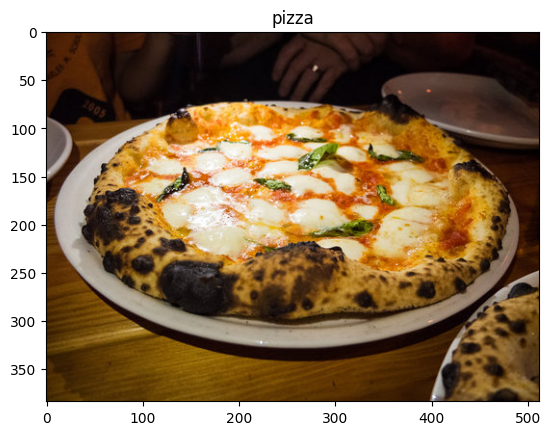

In [ ]:
# View a random image from the training dateset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
img

array([[[ 61,  25,   3],
        [ 63,  27,   5],
        [ 64,  28,   6],
        ...,
        [ 23,   8,   5],
        [ 24,   9,   6],
        [ 23,   8,   5]],

       [[ 61,  25,   3],
        [ 63,  27,   5],
        [ 64,  28,   6],
        ...,
        [ 19,   4,   1],
        [ 19,   4,   1],
        [ 18,   3,   0]],

       [[ 61,  25,   3],
        [ 63,  27,   5],
        [ 63,  27,   5],
        ...,
        [ 18,   3,   0],
        [ 17,   2,   0],
        [ 15,   0,   0]],

       ...,

       [[ 60,  33,   4],
        [ 59,  32,   2],
        [ 61,  34,   4],
        ...,
        [109,  81,  33],
        [101,  73,  25],
        [ 92,  64,  16]],

       [[ 63,  34,   4],
        [ 62,  33,   1],
        [ 64,  35,   1],
        ...,
        [110,  82,  34],
        [103,  75,  27],
        [ 94,  66,  18]],

       [[ 72,  43,  11],
        [ 70,  41,   7],
        [ 70,  42,   5],
        ...,
        [108,  80,  32],
        [103,  75,  27],
        [ 95,  67,  17]]

In [ ]:
# tensonrs with different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 61,  25,   3],
        [ 63,  27,   5],
        [ 64,  28,   6],
        ...,
        [ 23,   8,   5],
        [ 24,   9,   6],
        [ 23,   8,   5]],

       [[ 61,  25,   3],
        [ 63,  27,   5],
        [ 64,  28,   6],
        ...,
        [ 19,   4,   1],
        [ 19,   4,   1],
        [ 18,   3,   0]],

       [[ 61,  25,   3],
        [ 63,  27,   5],
        [ 63,  27,   5],
        ...,
        [ 18,   3,   0],
        [ 17,   2,   0],
        [ 15,   0,   0]],

       ...,

       [[ 60,  33,   4],
        [ 59,  32,   2],
        [ 61,  34,   4],
        ...,
        [109,  81,  33],
        [101,  73,  25],
        [ 92,  64,  16]],

       [[ 63,  34,   4],
        [ 62,  33,   1],
        [ 64,  35,   1],
        ...,
        [110,  82,  34],
        [103,  75,  27],
        [ 94,  66,  18]],

       [[ 72,  43,  11],
        [ 70,  41,   7],
        [ 70,  42,   5],
        ...,
        [108,  80,  3

In [ ]:
# View the shape
img.shape # Returns width, height and color channels

(384, 512, 3)

In [ ]:
# Get all the pixels values betweem 0 and 1 - Normalisation
img/255.

array([[[0.23921569, 0.09803922, 0.01176471],
        [0.24705882, 0.10588235, 0.01960784],
        [0.25098039, 0.10980392, 0.02352941],
        ...,
        [0.09019608, 0.03137255, 0.01960784],
        [0.09411765, 0.03529412, 0.02352941],
        [0.09019608, 0.03137255, 0.01960784]],

       [[0.23921569, 0.09803922, 0.01176471],
        [0.24705882, 0.10588235, 0.01960784],
        [0.25098039, 0.10980392, 0.02352941],
        ...,
        [0.0745098 , 0.01568627, 0.00392157],
        [0.0745098 , 0.01568627, 0.00392157],
        [0.07058824, 0.01176471, 0.        ]],

       [[0.23921569, 0.09803922, 0.01176471],
        [0.24705882, 0.10588235, 0.01960784],
        [0.24705882, 0.10588235, 0.01960784],
        ...,
        [0.07058824, 0.01176471, 0.        ],
        [0.06666667, 0.00784314, 0.        ],
        [0.05882353, 0.        , 0.        ]],

       ...,

       [[0.23529412, 0.12941176, 0.01568627],
        [0.23137255, 0.1254902 , 0.00784314],
        [0.23921569, 0

#### Steps to build a CNN to find patterns in our images.
*   Load our images
*   Preprocess our images
*   Build a CNN to find patterns in our images
*   Compile our CNN
*   Fit the CNN to our training data




In [ ]:
from IPython.core.display import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# set the seed
tf.random.set_seed(42)

# Preprocess data (get all if the pixel values between 0 & 1 , also called normalisation/scaling)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = train_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )


Epoch 1/5
47/47 [==============================] - 32s 291ms/step - loss: 0.5647 - accuracy: 0.7113 - val_loss: 0.4850 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4419 - accuracy: 0.7893 - val_loss: 0.3536 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4090 - accuracy: 0.8273 - val_loss: 0.3289 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 7s 148ms/step - loss: 0.3911 - accuracy: 0.8353 - val_loss: 0.3318 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.3504 - accuracy: 0.8553 - val_loss: 0.3305 - val_accuracy: 0.8480


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

# Using a non CNN model on our images.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 135ms/step - loss: 0.6932 - accuracy: 0.4973 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 109ms/step - loss: 0.6932 - accuracy: 0.4760 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.6932 - accuracy: 0.4947 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 602123 (2.30 MB)
Trainable params: 602123 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN(model_1), model_2 performs terribly..... let's try to improve it.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model same as model_2, but adding more to it.
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 139ms/step - loss: 4.3856 - accuracy: 0.6220 - val_loss: 0.7819 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.9582 - accuracy: 0.7140 - val_loss: 0.5580 - val_accuracy: 0.7700
Epoch 3/5
47/47 [==============================] - 8s 161ms/step - loss: 0.7535 - accuracy: 0.7193 - val_loss: 0.6901 - val_accuracy: 0.7380
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.5191 - accuracy: 0.7907 - val_loss: 0.6140 - val_accuracy: 0.7240
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.5747 - accuracy: 0.7780 - val_loss: 0.5369 - val_accuracy: 0.7800


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data.
2. Preprocess the data(prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat the baseline)
7. Repeat until satisfied.

Image shape: (512, 384, 3)
Image shape: (512, 512, 3)


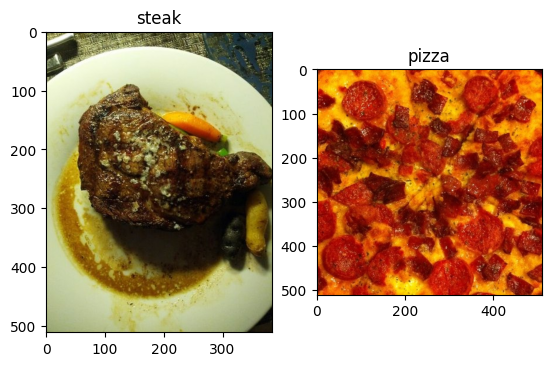

In [ ]:
# Visualizing the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [ ]:
# Get a sample of a train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.28235295, 0.2392157 , 0.30588236],
          [0.27058825, 0.227451  , 0.29411766],
          [0.27058825, 0.227451  , 0.29411766],
          ...,
          [0.08235294, 0.07058824, 0.1137255 ],
          [0.08235294, 0.05882353, 0.09803922],
          [0.0627451 , 0.03921569, 0.07843138]],
 
         [[0.30588236, 0.2627451 , 0.32941177],
          [0.28627452, 0.24313727, 0.30980393],
          [0.28235295, 0.2392157 , 0.3019608 ],
          ...,
          [0.07058824, 0.0627451 , 0.10588236],
          [0.08235294, 0.07058824, 0.10588236],
          [0.05490196, 0.04313726, 0.07843138]],
 
         [[0.3254902 , 0.28235295, 0.34509805],
          [0.30588236, 0.2627451 , 0.3254902 ],
          [0.3019608 , 0.25882354, 0.32156864],
          ...,
          [0.07058824, 0.07058824, 0.10196079],
          [0.07450981, 0.07058824, 0.10196079],
          [0.05882353, 0.05490196, 0.08627451]],
 
         ...,
 
         [[0.98823535, 1.        , 0.9725491 ],
          [0.98823

In [ ]:
# Creating a model (this will be our baseline, a 3 layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding='valid',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")  # output layer (working with binary classification so only 1 neuron)
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten (Flatten)           (None, 475240)            0         
                                                                 
 dense (Dense)               (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1/255.)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 500 images belonging to 2 classes.


In [ ]:
# Checking the length of the training and testing data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fitting the model
history_4 = model_4.fit(train_data, # this is the combination of the labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 26s 223ms/step - loss: 1.2607 - accuracy: 0.6320 - val_loss: 0.5384 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 5s 114ms/step - loss: 0.4881 - accuracy: 0.7820 - val_loss: 0.4926 - val_accuracy: 0.7640
Epoch 3/5
47/47 [==============================] - 7s 143ms/step - loss: 0.3949 - accuracy: 0.8367 - val_loss: 0.4127 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 6s 122ms/step - loss: 0.2843 - accuracy: 0.8927 - val_loss: 0.4494 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.1632 - accuracy: 0.9507 - val_loss: 0.4026 - val_accuracy: 0.8400


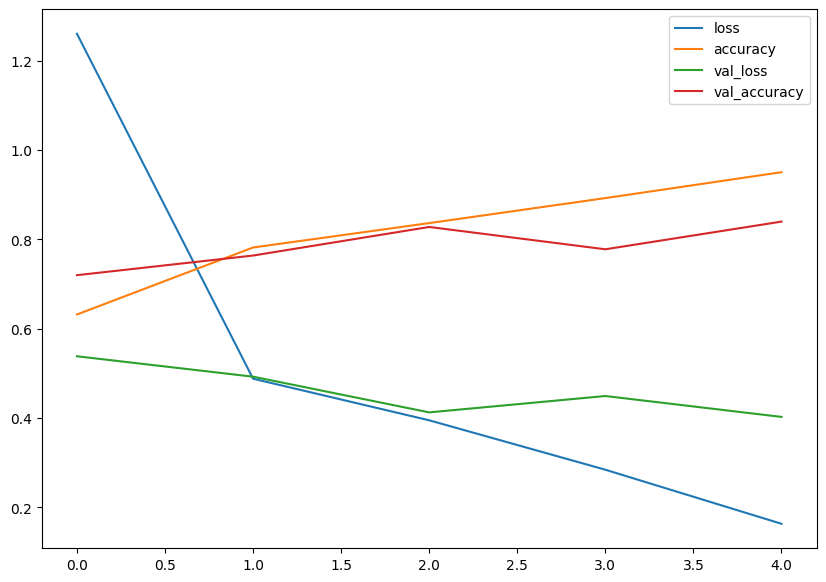

In [ ]:
# Evaluating our model (Plotting our models training curves)
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation matrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs we did run for

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

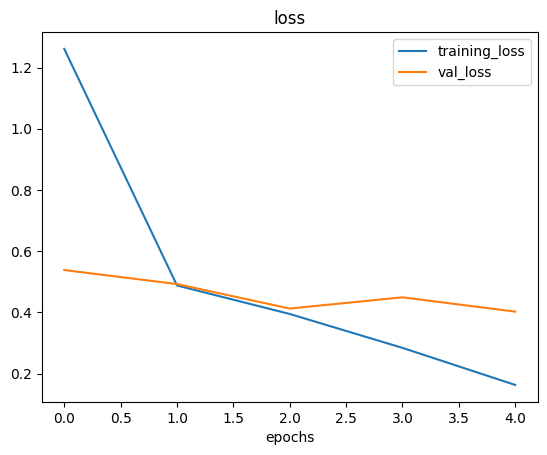

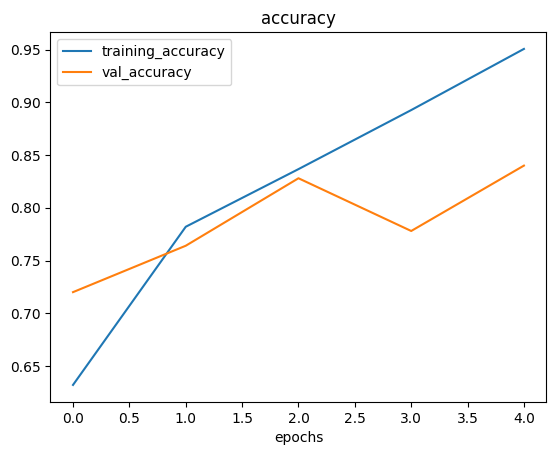

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

# Adjust the model parameters
### Fitting a machine learning model comes in 3 steps:
1. Create a baseline.
2. Beat the baseline by overfitting a larger model.
3. Reduce overfitting.

## Ways to reduce overfitting
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer.

## Reduce overfitting
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

In [ ]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 17s 118ms/step - loss: 0.5849 - accuracy: 0.7093 - val_loss: 0.5423 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 7s 141ms/step - loss: 0.4449 - accuracy: 0.8027 - val_loss: 0.3743 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4153 - accuracy: 0.8133 - val_loss: 0.3488 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.3910 - accuracy: 0.8300 - val_loss: 0.3579 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.3621 - accuracy: 0.8447 - val_loss: 0.3230 - val_accuracy: 0.8680


In [ ]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 10)       

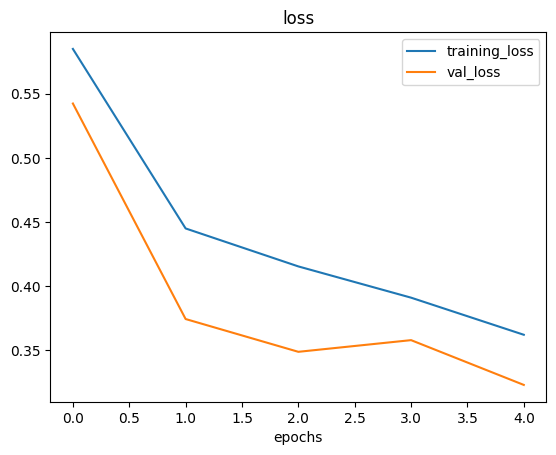

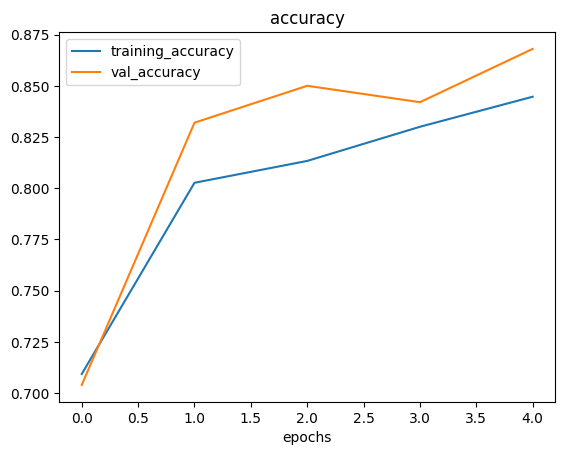

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

In [ ]:
# Data Augmentation
# Create ImageDataGeneraor training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

In [ ]:
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1./255)

### Data Augmentation
Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our model to learn more generalizable(hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

* Data augmentation is usually performed on the training data. Using `ImageDataGenerator`  built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# Import data and augment it from training directory
print("Augmented trainind data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # For demonstration purpose only
# Create non-augmented train data batches
print("Non-augmented training data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode="binary",
                                                shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented trainind data
Found 1500 images belonging to 2 classes.
Non-augmented training data: 
Found 1500 images belonging to 2 classes.
Non-augmented test data: 
Found 500 images belonging to 2 classes.


In [ ]:
# Get sample data batches
images, labels = train_data.next()

# Get sample augmented train data
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented... only data(images)


showing image number: 17


(-0.5, 223.5, 223.5, -0.5)

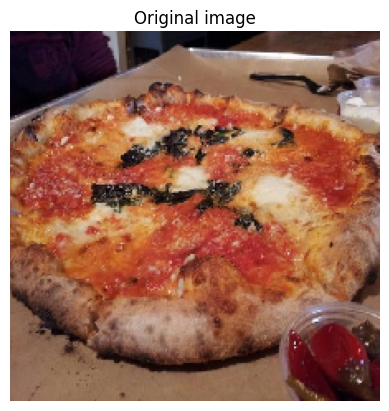

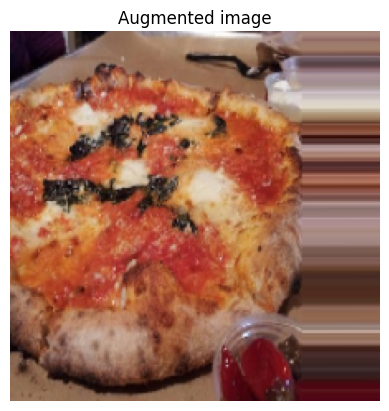

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False)

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu",input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

NameError: ignored

In [ ]:
plot_loss_curves(history_6)

Augmented and shuffled trainind data
Found 1499 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 474ms/step - loss: 0.6371 - accuracy: 0.6231 - val_loss: 0.4488 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 23s 489ms/step - loss: 0.4945 - accuracy: 0.7845 - val_loss: 0.3796 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 21s 432ms/step - loss: 0.4838 - accuracy: 0.7872 - val_loss: 0.3665 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 22s 463ms/step - loss: 0.4396 - accuracy: 0.8072 - val_loss: 0.3909 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 20s 425ms/step - loss: 0.4488 - accuracy: 0.7972 - val_loss: 0.3400 - val_accuracy: 0.8540


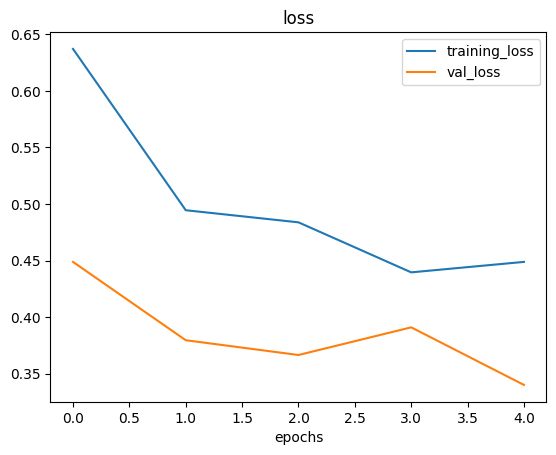

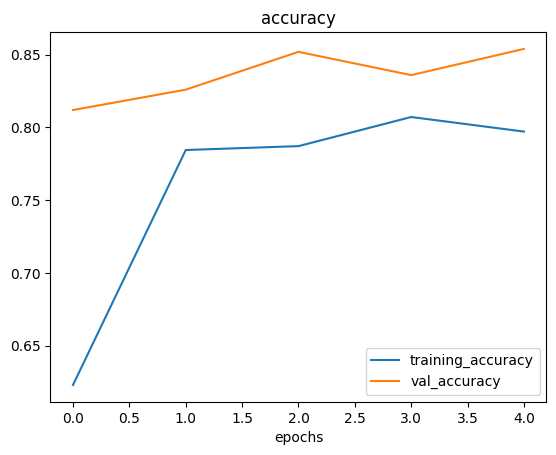

In [ ]:
# Let's shuffle our augmented training data and train another model, and see what happens.
print("Augmented and shuffled trainind data")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True) # For demonstration purpose only

model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

plot_loss_curves(history_7)

Augmenting and Shuffling our data(model_7) gave better results than just augmentinng them. Why?
* It is because when we simply augmented it without shuffling, it was training on pizza data, then on steak data for every epoch, i.e. adjusting its parameters according to pizza and then for steak.
By shuffling, we increased the randomness and hence letting the parameters be adjusted in such a way, that model gets better results.

### 7. Repeat until satisfied.
Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers(e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layers(e.g. from 10 to 32 or even 64)
* Train for longer(more epochs).
* Find an ideal learning rate.
* Get more data(give the model more opportunities to learn)
* Use `transfer learning` to leaverage what another image model has learn and adjust it for our own use case.

In [ ]:
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Dense(10, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Dense(10, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    Dense(10, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Dense(10, activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, "sigmoid")
])

In [ ]:
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary"
                                             )

Found 500 images belonging to 2 classes.


In [ ]:
history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 191s 4s/step - loss: 0.6188 - accuracy: 0.6240 - val_loss: 0.4107 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 173s 4s/step - loss: 0.4860 - accuracy: 0.7827 - val_loss: 0.4638 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 141s 3s/step - loss: 0.4484 - accuracy: 0.8067 - val_loss: 0.3899 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 140s 3s/step - loss: 0.4194 - accuracy: 0.8207 - val_loss: 0.3675 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 143s 3s/step - loss: 0.3920 - accuracy: 0.8373 - val_loss: 0.3722 - val_accuracy: 0.8520


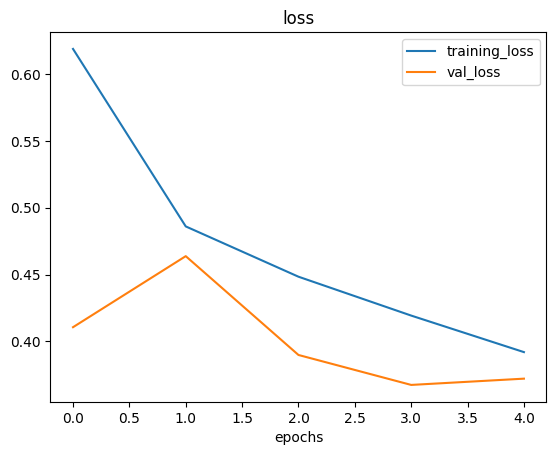

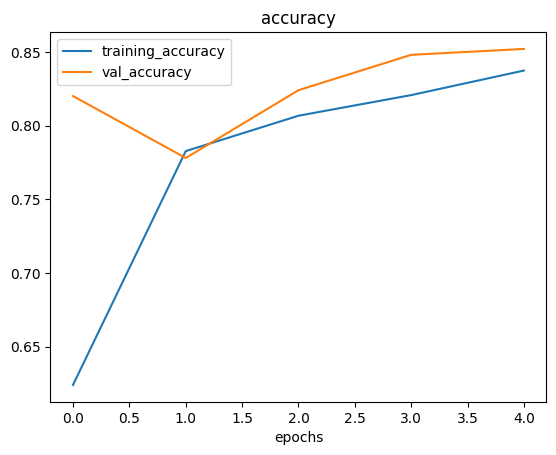

In [ ]:
plot_loss_curves(history_8)

In [ ]:
class_names = !ls pizza_steak/train
print(class_names)

['pizza  steak']


In [ ]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")

--2023-11-21 07:14:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-11-21 07:14:00 (28.3 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

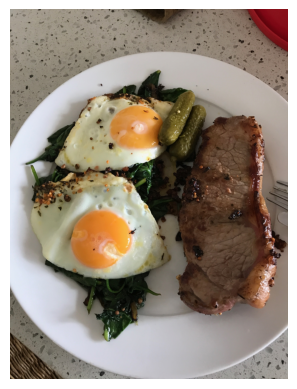

In [ ]:
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Check the shape of our image
steak.shape
# (4032, 3024, 3)
# It has height, width and color channels but our input size also needs another dimension
# that is batch size.
# to do it we will expand the dimensions.

(4032, 3024, 3)

* When you train a neural network and you want to make prediction with it on your own custom data, it's important that your custom data is preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import and image and resize it to be able to be used with our model.
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, color_channels).
  """
  # Read the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

1/1 [==============================] - 0s 28ms/step


array([[0.14233975]], dtype=float32)

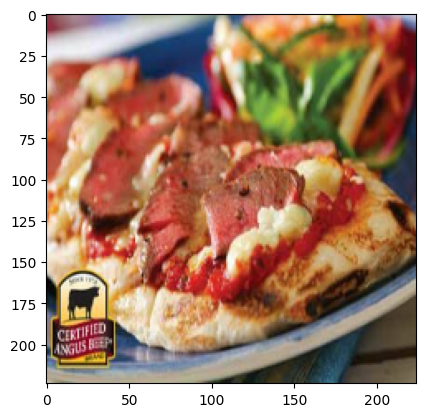

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)
expanded_steak.shape
model_5.predict(expanded_steak)
steak = load_and_prep_image("pizzasteakSample.jpg")
steak
plt.imshow(steak)
expanded_steak = tf.expand_dims(steak, axis=0)
expanded_steak.shape
model_5.predict(expanded_steak)